# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

<img src="https://news.store.rambler.ru/img/d52ddd85719025e93d2be214d6b49da6" alt="Drawing" style="width: 600px;"/>

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-1.0.1">Описание этапа обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.0.2">Описание данных</a></span></li></ul></li></ul></li><li><span><a href="#Реализация-проекта" data-toc-modified-id="Реализация-проекта-2">Реализация проекта</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек.-Загрузка-данных" data-toc-modified-id="Импорт-библиотек.-Загрузка-данных-2.1">Импорт библиотек. Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.2">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#1.-data_arc---данные-об-электродах" data-toc-modified-id="1.-data_arc---данные-об-электродах-2.2.1">1. data_arc - данные об электродах</a></span></li><li><span><a href="#2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)" data-toc-modified-id="2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)-2.2.2">2. data_bulk - данные о подаче сыпучих материалов (объем)</a></span></li><li><span><a href="#3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)-2.2.3">3. data_bulk_time - данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#4.-data_gas---данные-о-продувке-сплава-газом" data-toc-modified-id="4.-data_gas---данные-о-продувке-сплава-газом-2.2.4">4. data_gas - данные о продувке сплава газом</a></span></li><li><span><a href="#5.-data_temp---результаты-измерения-температуры.-Целевая-фича" data-toc-modified-id="5.-data_temp---результаты-измерения-температуры.-Целевая-фича-2.2.5">5. data_temp - результаты измерения температуры. Целевая фича</a></span></li><li><span><a href="#6.-data_wire---данные-о-проволочных-материалах-(объём)" data-toc-modified-id="6.-data_wire---данные-о-проволочных-материалах-(объём)-2.2.6">6. data_wire - данные о проволочных материалах (объём)</a></span></li><li><span><a href="#7.-data_wire_time---данные-о-проволочных-материалах-(время)" data-toc-modified-id="7.-data_wire_time---данные-о-проволочных-материалах-(время)-2.2.7">7. data_wire_time - данные о проволочных материалах (время)</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.3">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-таргета" data-toc-modified-id="Подготовка-таргета-2.3.1">Подготовка таргета</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2.3.2">Объединение таблиц</a></span><ul class="toc-item"><li><span><a href="#1.-data_arc---данные-об-электродах" data-toc-modified-id="1.-data_arc---данные-об-электродах-2.3.2.1">1. data_arc - данные об электродах</a></span></li><li><span><a href="#2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)" data-toc-modified-id="2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)-2.3.2.2">2. data_bulk - данные о подаче сыпучих материалов (объем)</a></span></li><li><span><a href="#3.-data_wire---данные-о-проволочных-материалах-(объём)" data-toc-modified-id="3.-data_wire---данные-о-проволочных-материалах-(объём)-2.3.2.3">3. data_wire - данные о проволочных материалах (объём)</a></span></li><li><span><a href="#Объединение" data-toc-modified-id="Объединение-2.3.2.4">Объединение</a></span></li></ul></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-2.3.3">Обработка выбросов</a></span></li><li><span><a href="#Разбиение-данных-на-train-и-test" data-toc-modified-id="Разбиение-данных-на-train-и-test-2.3.4">Разбиение данных на train и test</a></span></li><li><span><a href="#Грубая-предобработка-train" data-toc-modified-id="Грубая-предобработка-train-2.3.5">Грубая предобработка train</a></span></li><li><span><a href="#Предобработка-train-/-test-для-машинного-обучения" data-toc-modified-id="Предобработка-train-/-test-для-машинного-обучения-2.3.6">Предобработка train / test для машинного обучения</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.4">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Выявление-самых-информативных-фичей" data-toc-modified-id="Выявление-самых-информативных-фичей-2.4.1">Выявление самых информативных фичей</a></span></li><li><span><a href="#Обучение-LinearRegression" data-toc-modified-id="Обучение-LinearRegression-2.4.2">Обучение LinearRegression</a></span></li><li><span><a href="#Обучение-RandomForestRegressor" data-toc-modified-id="Обучение-RandomForestRegressor-2.4.3">Обучение RandomForestRegressor</a></span></li><li><span><a href="#Обучение-CatBoostRegressor" data-toc-modified-id="Обучение-CatBoostRegressor-2.4.4">Обучение CatBoostRegressor</a></span></li><li><span><a href="#Обучение-LightGBM" data-toc-modified-id="Обучение-LightGBM-2.4.5">Обучение LightGBM</a></span></li><li><span><a href="#Обучение-XGBoost" data-toc-modified-id="Обучение-XGBoost-2.4.6">Обучение XGBoost</a></span></li></ul></li><li><span><a href="#Тюнинг-самой-результативной-модели" data-toc-modified-id="Тюнинг-самой-результативной-модели-2.5">Тюнинг самой результативной модели</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2.5.1">Feature engineering</a></span></li></ul></li><li><span><a href="#Дополнительное-задание" data-toc-modified-id="Дополнительное-задание-2.6">Дополнительное задание</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.7">Выводы</a></span></li></ul></li></ul></div>

# Реализация проекта

## Импорт библиотек. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import warnings

In [2]:
pd.options.mode.chained_assignment = None  

In [3]:
data_arc = pd.read_csv('final_steel/data_arc.csv')
data_bulk = pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('final_steel/data_gas.csv')
data_temp = pd.read_csv('final_steel/data_temp.csv')
data_wire = pd.read_csv('final_steel/data_wire.csv')
data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')

## Анализ данных

### 1. data_arc - данные об электродах

In [4]:
def analisys(data, describe=True):
    print('Первые 5 строк таблицы:')
    display(data.head())
    print('Информация о таблице:')
    display(data.info())
    if describe == True:
        print('Основные статистики числовых параметров:')
        display(data.describe())
    print('Максимальное количество строк с пропусками:', data.isna().sum().max())
    print()
    print('Количество дубликатов:', data.duplicated().sum())

In [5]:
analisys(data_arc)

Первые 5 строк таблицы:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

Основные статистики числовых параметров:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Максимальное количество строк с пропусками: 0

Количество дубликатов: 0


Визуализируем параметры мощности. Чтобы график реактивной отобразился корректно, отбросим строку с высоким отрицательным значением.

In [6]:
def hist_plot(data, features, union=False, box_plot=True):
    for feature in features:
        plt.figure(figsize=(15,4))
        plt.hist(data[feature], histtype='bar', bins=30)
        plt.title('Гистограмма параметра ' + feature)
        plt.xlabel(feature)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        #Бокс плот
        if box_plot==True:
            plt.figure(figsize=(15,1))
            plt.boxplot(data[feature], vert=False)
            plt.xlabel(feature)
            plt.title('Диаграмма размаха параметра ' + feature)
            plt.show()


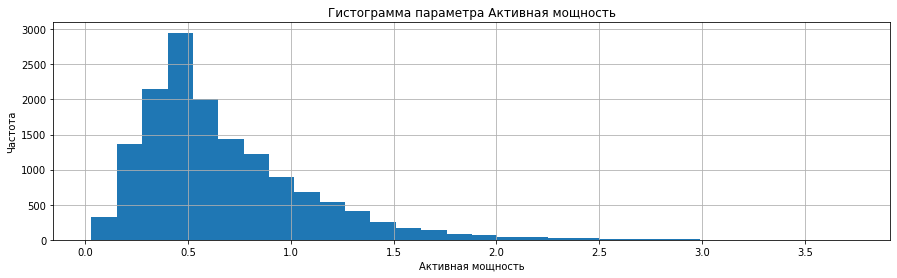

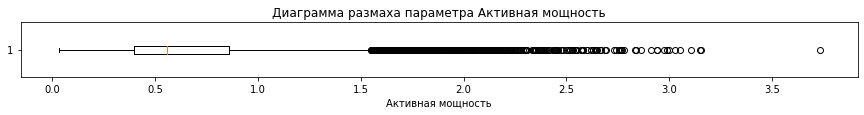

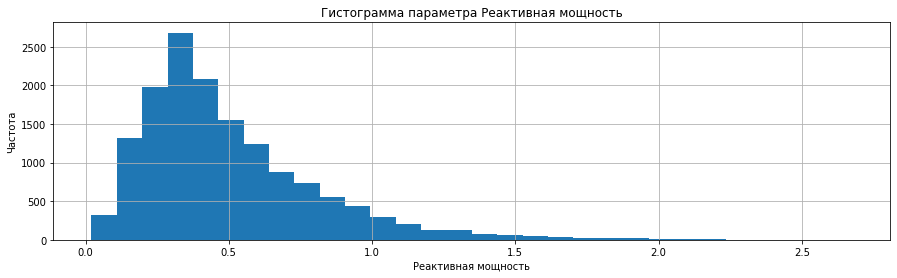

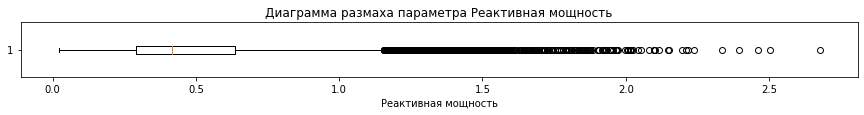

In [7]:
hist_plot(data_arc.loc[data_arc.iloc[:, 4] > 0], data_arc.columns[3:5], union=False)

Распределения похожи на нормальные, с длинным правым хвостом. Диаграммы распределения говорят нам о том, что это выбросы. Причем, их достаточно большое количество.

**План предобработки data_arc:**
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [ ] Обработать столбцы Начало/Конец нагрева дугой. Привести к datetime64
- [ ] Столбец Реактивная мощность - содержит высокое отрицательное значение. Обработать его и прочие выбросы.

### 2. data_bulk - данные о подаче сыпучих материалов (объем)

In [8]:
analisys(data_bulk)

Первые 5 строк таблицы:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

Основные статистики числовых параметров:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Максимальное количество строк с пропусками: 3128

Количество дубликатов: 0


**План предобработки data_bulk:**
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [x] Большое количество пропусков. Так как это данные об объеме добавленных сыпучих материалов, можно предположить, что пропуски - это отсутствие добавок. Следовательно, можно заполнить Nan на 0 значение.
- [ ] Столбец Bulk-8 имеет единственное значение. Странно. Проверить.
- Количество ключей 3129 - в то время как максимальное значение ключа = 3241. Вероятно, есть этапы когда вообще не добавлялось никаких материалов в сплав.
- [x] Отыскать различные типы стали по тому, какие типы сыпучих материалов добавлены в состав. (оказалось слишком много)

### 3. data_bulk_time - данные о подаче сыпучих материалов (время)

In [9]:
analisys(data_bulk_time, describe=False)

Первые 5 строк таблицы:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

Максимальное количество строк с пропусками: 3128

Количество дубликатов: 0


**План предобработки data_bulk_time:**<br>
Данные соответствуют по количеству значений таблице date_bulk. Возможно, эта таблица избыточна. Но мы составим план ее предобработки на случай, если она все-таки пригодится.
- [ ] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [ ] Данные содержат информацию о дате добавления сыпучих материалов. Привести тип object к типу datetime64
- [ ] Данные имеют большое количество пропусков. Чем их обработать пока неясно.

Некоторые материалы (напр. bulk_12, bulk_14, bulk_15) добавляются одновременно (судя по голове таблицы).

### 4. data_gas - данные о продувке сплава газом

In [10]:
analisys(data_gas)

Первые 5 строк таблицы:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Основные статистики числовых параметров:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Максимальное количество строк с пропусками: 0

Количество дубликатов: 0


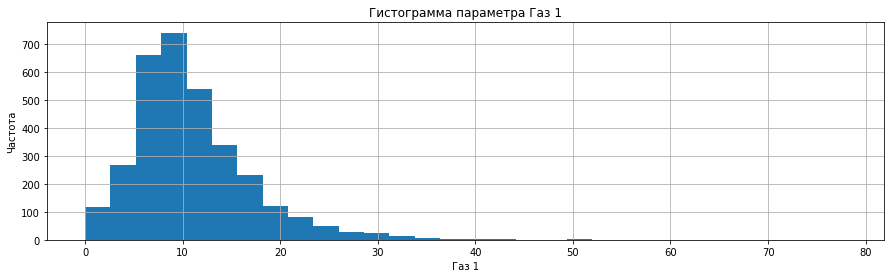

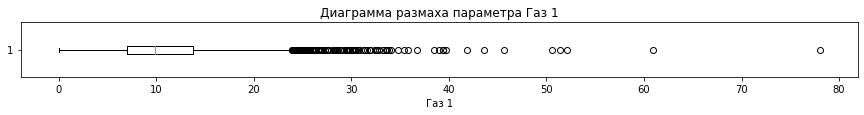

In [11]:
hist_plot(data_gas, [data_gas.columns[1]])

Наблюдаем распределение близкое к нормальному, с длинным правым хвостом в виде выбросов.

**План предобработки data_gas:**
- Количество ключей больше чем в предыдущих таблицах. Min / max значения совпадают. Вероятно, есть партии которые продувались газом, но в чей состав не добавлялось легирующих добавок.
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [ ] Обработать выбросы

### 5. data_temp - результаты измерения температуры. Целевая фича

In [12]:
analisys(data_temp)

Первые 5 строк таблицы:


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

Основные статистики числовых параметров:


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Максимальное количество строк с пропусками: 2901

Количество дубликатов: 0


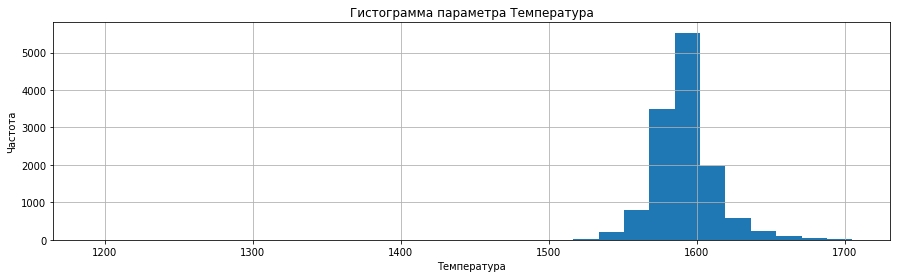

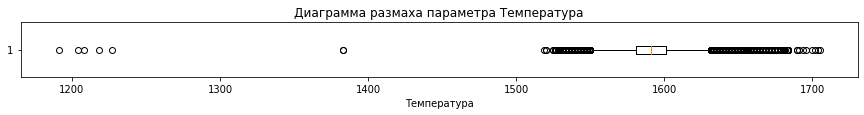

In [13]:
hist_plot(data_temp.dropna(axis=0), [data_temp.columns[2]])

Большая часть данных, визуально, распределена нормально. Однако, в хвостах содержиться большое количество аномалий. 

Согласно [wiki](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D0%BB%D1%8C#:~:text=%D0%A2%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0%20%D0%BF%D0%BB%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%3A%201450%E2%80%941520%20%C2%B0C.%20%D0%A3%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F,%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B8%20%D1%82%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B5%20100%20%C2%B0C%3A),
температура плавления стали: 1450—1520 °C. На производстве ковш всегда подогревается чтобы недопустить остывания стали. 
Поэтому, все что ниже 1450 °C - точно выбросы.

**План предобработки data_temp:**
- Min / max значения ключей совпадают с предыдущими таблицами.
- [ ] Есть несколько тысяч пропущеных значений температуры. Обработать пропуски.
- [ ] Изменить формат столбца "Время замера". Привести к datetime64
- [ ] Если последний замер температуры был раньше, чем нагрев ковша - удаляем информацию обо всей партии
- [ ] Обработать выбросы

### 6. data_wire - данные о проволочных материалах (объём)

In [14]:
analisys(data_wire)

Первые 5 строк таблицы:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

Основные статистики числовых параметров:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Максимальное количество строк с пропусками: 3080

Количество дубликатов: 0


**План предобработки data_wire:**

- [ ] Большое количество пропусков. Таблица несет информацию о проволочных материалах которые добавляют в состав слава. Поэтому отсутствие информации - означает нулевой объем добавок. Следовательно, заполняем пропуски нулями. 
- [ ] Использовать эти данные для определения типа стали.

### 7. data_wire_time - данные о проволочных материалах (время)

In [15]:
analisys(data_wire_time)

Первые 5 строк таблицы:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Основные статистики числовых параметров:


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Максимальное количество строк с пропусками: 3080

Количество дубликатов: 0


**План предобработки data_wire_time:**

Аналогичная data_wire таблица, несущая информацию о времени. Как и data_bulk_time может быть избыточной. Возможно пригодится для определения марки стали. 

- [ ] Большое количество пропусков. Обработать

## Предобработка данных

В первую очередь обработаем все данные методами, которые не имеют риска утечки целевого признака.

**Цель** - свести все производственные данные в одну общую таблицу для передачи модели.

Все таблицы имеют проблемы с названиями фичей. Напишем функцию для переименования:

In [16]:
def rename_columns(data, new_names=[], rename=True):
    if rename == False:
        new_names=[]
        for col in data.columns:
            new_names.append(str.lower('_'.join(col.split(' '))))
        data.columns = new_names
    else:
        data.columns = new_names

Теперь подготовим латинские названия для некоторых фреймов. Колонки всех таблиц приведем к нижнему регистру без разделителей:

In [17]:
data_arc_cols = ['key', 'start_heating', 'end_heating', 'active_power', 'reactive_power']
data_gas_cols = ['key', 'gas']
data_temp_cols = ['key', 'measure_time', 'temperature']

In [18]:
rename_columns(data_arc, data_arc_cols, rename=True)
rename_columns(data_bulk, rename=False)
rename_columns(data_bulk_time, rename=False)
rename_columns(data_gas, data_gas_cols, rename=True)
rename_columns(data_temp, data_temp_cols, rename=True)
rename_columns(data_wire, rename=False)
rename_columns(data_wire_time, rename=False)

Посмотрим на результат:

In [19]:
data_arc.columns

Index(['key', 'start_heating', 'end_heating', 'active_power',
       'reactive_power'],
      dtype='object')

Все работает. Начнем предобработку данных об электродах

### Подготовка таргета

Целевой признак спрятан в таблице data_temp. Вытащим его, и обработаем.

В таблицах есть данные партий сплавов, которые не имеют некоторых важных признаков. Финальную температуру таких партий просто невозможно будет предсказать. Заранее почистим данные, оставив только информативные наблюдения. Одно из допущений необходимых для работы модели состоит в том, что производство работает в одном более-менее статичном режиме.

Для работы модели нам необходимо соответсвие таргета следующим условиям:
- Количество измерений температуры партии > 1
- Финальный замер температуры должен быть последним звеном в производственной цепочке
- Использование результатов промежуточных измерений температуры запрещено, т.к. считается ликом в данных
- Данные результаты измерения температуры которых ниже температуры плавления стали - считаются выбросами

Сразу отберем партии по вышеописанным признакам. С ними и продолжим всю дальнейшую работу.

In [20]:
data_temp.head(7)

,key,measure_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0


Найдем те партии, время нагрева ковша которых было позже последнего замера температуры.

Для начала, отберем те строки, значение температуры которых не NaN. Сгруппируем по ключу и найдем последнее время замера:

In [21]:
data_temp['measure_time'] = pd.to_datetime(data_temp['measure_time'])
print('Количество партий до обработки:', data_temp['key'].nunique())

Количество партий до обработки: 3216


In [22]:
last_mesure_data = data_temp.loc[~data_temp['temperature'].isna()].groupby('key', as_index=False).agg(last_measure = ('measure_time', 'last'),
                                                               last_temp = ('temperature', 'last'),
                                                               count_measures = ('temperature', 'count'))
last_mesure_data = last_mesure_data.loc[last_mesure_data['count_measures'] > 1]
display(last_mesure_data.head())
print('Количество пропущеных значений last_temp:', last_mesure_data['last_temp'].isna().sum())
print('Всего значений в таблице:', last_mesure_data.shape[0])

,key,last_measure,last_temp,count_measures
0,1,2019-05-03 11:30:39,1613.0,5
1,2,2019-05-03 11:59:12,1602.0,6
2,3,2019-05-03 12:34:57,1599.0,5
3,4,2019-05-03 12:59:25,1625.0,3
4,5,2019-05-03 13:36:01,1602.0,2


Количество пропущеных значений last_temp: 0
Всего значений в таблице: 2475


Отлично, таким образом мы отобрали самые ценные данные. Теперь сравним время замера температуры. Отберем только строки, время замера температуры которых позже, чем время начала / конца нагрева ковша:

In [23]:
data_arc_row = pd.read_csv('final_steel/data_arc.csv')
data_arc_row = data_arc_row.groupby('key', as_index=False).agg(last_start_heating = ('Начало нагрева дугой', 'last'),
                                                               last_end_heating = ('Конец нагрева дугой', 'last'))
data_arc_row['last_start_heating'] = pd.to_datetime(data_arc_row['last_start_heating'])
data_arc_row['last_end_heating'] = pd.to_datetime(data_arc_row['last_end_heating'])

data_arc_row.head()

,key,last_start_heating,last_end_heating
0,1,2019-05-03 11:26:09,2019-05-03 11:28:37
1,2,2019-05-03 11:49:48,2019-05-03 11:53:18
2,3,2019-05-03 12:31:14,2019-05-03 12:32:19
3,4,2019-05-03 12:53:12,2019-05-03 12:57:50
4,5,2019-05-03 13:32:44,2019-05-03 13:33:55


In [24]:
joined_meas_heat = last_mesure_data.merge(data_arc_row, right_on='key', left_on='key')
display(joined_meas_heat.head())
print('Количество уникальных партий до сравнения:', joined_meas_heat['key'].nunique())

,key,last_measure,last_temp,count_measures,last_start_heating,last_end_heating
0,1,2019-05-03 11:30:39,1613.0,5,2019-05-03 11:26:09,2019-05-03 11:28:37
1,2,2019-05-03 11:59:12,1602.0,6,2019-05-03 11:49:48,2019-05-03 11:53:18
2,3,2019-05-03 12:34:57,1599.0,5,2019-05-03 12:31:14,2019-05-03 12:32:19
3,4,2019-05-03 12:59:25,1625.0,3,2019-05-03 12:53:12,2019-05-03 12:57:50
4,5,2019-05-03 13:36:01,1602.0,2,2019-05-03 13:32:44,2019-05-03 13:33:55


Количество уникальных партий до сравнения: 2475


Отберем нужные нам партии соответствующие условию по времени:

In [25]:
good_keys = joined_meas_heat.loc[(joined_meas_heat['last_measure'] > joined_meas_heat['last_start_heating']) |
                     (joined_meas_heat['last_measure'] > joined_meas_heat['last_end_heating'])]['key'].values
good_keys

array([   1,    2,    3, ..., 2497, 2498, 2499])

Отфильтруем найденные партии металла:

In [26]:
final_measure_temp_data = last_mesure_data.loc[last_mesure_data['key'].isin(good_keys)]
display(final_measure_temp_data.head())
print('Количество уникальных партий после сравнения:', final_measure_temp_data['key'].nunique())

,key,last_measure,last_temp,count_measures
0,1,2019-05-03 11:30:39,1613.0,5
1,2,2019-05-03 11:59:12,1602.0,6
2,3,2019-05-03 12:34:57,1599.0,5
3,4,2019-05-03 12:59:25,1625.0,3
4,5,2019-05-03 13:36:01,1602.0,2


Количество уникальных партий после сравнения: 2344


Таким образом, наш таргет лишился ~900 уникальных партий. Что примерно равно 27% данных. Много, но сделать с этим ничего нельзя.

Дальше будем работать только с отобранными партиями металла.

Обогатим признаковое пространство. Добавим:
- [ ] (лик в данных?) Среднее время интервала между замерами
- [x] Начальную температуру

In [27]:
final_measure_temp_data = final_measure_temp_data.join(data_temp.groupby('key', as_index=False).agg(start_temp=('temperature', 'first'))['start_temp'],
                                                      how='left', rsuffix='_r')

final_measure_temp_data = final_measure_temp_data.drop('last_measure', axis=1)

In [28]:
display(final_measure_temp_data.head())
print('Количество уникальных партий стали:', final_measure_temp_data['key'].nunique())

,key,last_temp,count_measures,start_temp
0,1,1613.0,5,1571.0
1,2,1602.0,6,1581.0
2,3,1599.0,5,1596.0
3,4,1625.0,3,1601.0
4,5,1602.0,2,1576.0


Количество уникальных партий стали: 2344


Сохраним хорошие ключи:

In [29]:
good_keys = final_measure_temp_data['key'].unique()

Посмотрим на матрицу корреляции:

In [30]:
final_measure_temp_data.corr()

,key,last_temp,count_measures,start_temp
key,1.000000,-0.078449,-0.057583,-0.011472
last_temp,-0.078449,1.000000,0.054814,0.366398
count_measures,-0.057583,0.054814,1.000000,0.100176
start_temp,-0.011472,0.366398,0.100176,1.000000


Высокой корреляции нет. Призаки оставляем.

### Объединение таблиц

#### 1. data_arc - данные об электродах

In [31]:
data_arc.head()

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Производственный процесс подразумевает несколько циклов нагрева сплава. Это мы и видим в таблице. Однако, такой формат даты нам неудобен. Машина не сможет понять зависимостей в данных. Лучше, если мы найдем время нагрева в секундах, и сведем в один столбец. 

In [32]:
data_arc['heating_time'] = (((pd.to_datetime(data_arc['end_heating']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')) - 
 ((pd.to_datetime(data_arc['start_heating']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')))

In [39]:
data_arc.head()

,key,start_heating,end_heating,active_power,reactive_power,heating_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148


[Доп. задание]: 

Вам поручили изучить характеристики процесса обработки стали. Для каждого значения столбца key найдите:

- [ ] Длительность времени между первым и последним замером температуры.
- [x] Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов.
- [x] Количество запусков нагрева электродами.
- [x] Среднее соотношение потребления активной и реактивной мощности.


По всем полученным столбцам вычислите статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей

In [40]:
data_arc['power_ratio'] = data_arc['active_power'] / data_arc['reactive_power']

In [41]:
data_arc.head()

,key,start_heating,end_heating,active_power,reactive_power,heating_time,power_ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148,1.671717


Наблюдаем высокую корреляцию между active_power и heating_time. Вероятно, время нагрева - это величина мощности. Тогда от одного из этих признаков нужно будет избавиться. При этом, признак reactive_power явно коррелирует с active_power, но матрица говорит об обратном. Возможно, отрицательное значение так влияет. Посмотрим на корреляцию без отрицательных значений:

In [38]:
data_arc_grouped.loc[data_arc['reactive_power'] > 0].corr()

,key,active_power,reactive_power,heating_time
key,1.000000,-0.021367,-0.000159,-0.018341
active_power,-0.021367,1.000000,0.963182,0.974129
reactive_power,-0.000159,0.963182,1.000000,0.971269
heating_time,-0.018341,0.974129,0.971269,1.000000


Как и ожидалось, корреляция между всеми признаками очень высока. Сейчас мы можем отбросить фичи reactive_power и active_power, т.к. heating_time несет достаточное количество информации. Затем сгруппируем данные по ключу, и найдем количество раз нагрева сплава. Значение времени агрегируем средним.

In [49]:
data_arc_grouped = data_arc.groupby('key', as_index=False).agg(heating_time_mean = ('heating_time', 'mean'),
                                                               heating_time_min = ('heating_time', 'min'),
                                                               heating_time_max = ('heating_time', 'max'),
                                                               heating_time_median = ('heating_time', 'median'),
                                                               heating_time_q25 = ('heating_time', lambda x: np.percentile(x, q=25)),
                                                               heating_time_q75 = ('heating_time', lambda x: np.percentile(x, q=75)),
                                                               heating_time_total = ('heating_time', 'sum'),
                                                               num_heatings = ('heating_time', 'count'),
                                                               power_ratio_mean = ('power_ratio', 'mean'),
                                                               power_ratio_min = ('heating_time', 'min'),
                                                               power_ratio_max = ('heating_time', 'max'),
                                                               power_ratio_median = ('heating_time', 'median'),
                                                               power_ratio_q25 = ('heating_time', lambda x: np.percentile(x, q=25)),
                                                               power_ratio_q75 = ('heating_time', lambda x: np.percentile(x, q=75)),
                                                               power_ratio_total = ('heating_time', 'sum'))                                            

In [50]:
data_arc_grouped.head(3)

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,power_ratio_min,power_ratio_max,power_ratio_median,power_ratio_q25,power_ratio_q75,power_ratio_total
0,1,219.60,148,365,185.0,172.00,228.0,1098,5,1.538898,148,365,185.0,172.00,228.0,1098
1,2,202.75,126,338,173.5,134.25,242.0,811,4,1.551834,126,338,173.5,134.25,242.0,811
2,3,131.00,65,280,109.0,77.00,124.0,655,5,1.583120,65,280,109.0,77.00,124.0,655


In [52]:
data_arc = data_arc_grouped

In [53]:
data_arc.corr()

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,power_ratio_min,power_ratio_max,power_ratio_median,power_ratio_q25,power_ratio_q75,power_ratio_total
key,1.000000,-0.021040,-0.022285,-0.026510,-0.002953,0.000985,-0.023417,-0.045159,-0.024143,-0.109085,-0.022285,-0.026510,-0.002953,0.000985,-0.023417,-0.045159
heating_time_mean,-0.021040,1.000000,0.546041,0.773581,0.834379,0.738119,0.905373,0.554100,-0.042178,0.055403,0.546041,0.773581,0.834379,0.738119,0.905373,0.554100
heating_time_min,-0.022285,0.546041,1.000000,0.083900,0.517802,0.766328,0.335149,-0.045134,-0.433435,-0.075083,1.000000,0.083900,0.517802,0.766328,0.335149,-0.045134
heating_time_max,-0.026510,0.773581,0.083900,1.000000,0.402963,0.240124,0.672319,0.710251,0.285032,0.124437,0.083900,1.000000,0.402963,0.240124,0.672319,0.710251
heating_time_median,-0.002953,0.834379,0.517802,0.402963,1.000000,0.813936,0.783097,0.367562,-0.137605,0.007945,0.517802,0.402963,1.000000,0.813936,0.783097,0.367562
heating_time_q25,0.000985,0.738119,0.766328,0.240124,0.813936,1.000000,0.559186,0.187305,-0.285474,-0.048275,0.766328,0.240124,0.813936,1.000000,0.559186,0.187305
heating_time_q75,-0.023417,0.905373,0.335149,0.672319,0.783097,0.559186,1.000000,0.543876,0.016783,0.064910,0.335149,0.672319,0.783097,0.559186,1.000000,0.543876
heating_time_total,-0.045159,0.554100,-0.045134,0.710251,0.367562,0.187305,0.543876,1.000000,0.777424,0.082747,-0.045134,0.710251,0.367562,0.187305,0.543876,1.000000
num_heatings,-0.024143,-0.042178,-0.433435,0.285032,-0.137605,-0.285474,0.016783,0.777424,1.000000,0.067872,-0.433435,0.285032,-0.137605,-0.285474,0.016783,0.777424
power_ratio_mean,-0.109085,0.055403,-0.075083,0.124437,0.007945,-0.048275,0.064910,0.082747,0.067872,1.000000,-0.075083,0.124437,0.007945,-0.048275,0.064910,0.082747


Высокой корреляции между признаками нет. Мы сохранили большую часть информации, при этом добавили новую, и уменьшили количество фичей.

In [54]:
data_arc.describe()

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,power_ratio_min,power_ratio_max,power_ratio_median,power_ratio_q25,power_ratio_q75,power_ratio_total
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1623.061294,172.339290,88.982265,288.464219,158.096920,122.997511,206.716086,794.579029,4.628500,1.357452,88.982265,288.464219,158.096920,122.997511,206.716086,794.579029
std,934.739859,45.606667,38.607935,109.670010,46.068181,38.173634,61.831203,332.448622,1.608647,0.132824,38.607935,109.670010,46.068181,38.173634,61.831203,332.448622
min,1.000000,57.000000,11.000000,57.000000,43.000000,26.000000,57.000000,57.000000,1.000000,0.676106,11.000000,57.000000,43.000000,26.000000,57.000000,57.000000
25%,817.250000,140.000000,62.000000,208.000000,126.000000,97.000000,162.250000,571.000000,4.000000,1.292892,62.000000,208.000000,126.000000,97.000000,162.250000,571.000000
50%,1623.500000,168.750000,82.000000,273.000000,153.000000,120.875000,198.000000,770.000000,4.000000,1.370550,82.000000,273.000000,153.000000,120.875000,198.000000,770.000000
75%,2431.750000,200.383333,117.000000,342.000000,184.500000,144.250000,244.500000,983.000000,6.000000,1.438292,117.000000,342.000000,184.500000,144.250000,244.500000,983.000000
max,3241.000000,380.000000,307.000000,907.000000,421.000000,319.750000,534.750000,4189.000000,16.000000,1.782164,307.000000,907.000000,421.000000,319.750000,534.750000,4189.000000


Есть партии, которые прошли 16 циклов нагревания! При этом медианное значение всего 4 цикла. Что-то там пошло не так... Оставим это наблюдение. Может быть избавимся от этих выбросов позже.

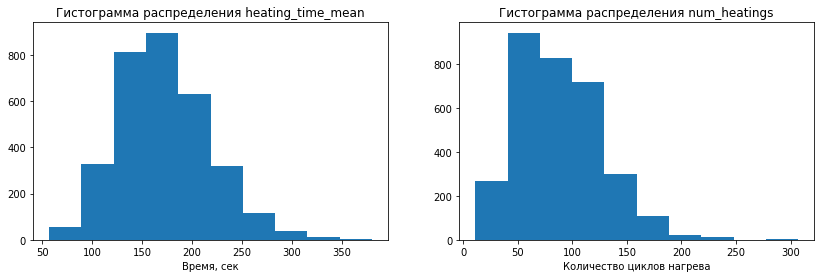

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(14, 4))

ax[0].set_title('Гистограмма распределения ' + data_arc.columns[1])
ax[0].hist(data_arc.iloc[:, 1])
ax[0].set_xlabel('Время, сек')


ax[1].set_title('Гистограмма распределения ' + data_arc.columns[8])
ax[1].hist(data_arc.iloc[:, 2])
ax[1].set_xlabel('Количество циклов нагрева')
plt.show()

#### 2. data_bulk - данные о подаче сыпучих материалов (объем)

In [57]:
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Таблица имеет большое количество пропусков. Заполним их нулями:

In [58]:
data_bulk = data_bulk.fillna(0)
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


-- Далее была совершена попытка выявить сорт стали по имеющимся добавкам. Однако, уникальных комбинаций добавок получилось 143 шт. Оставляем таблицу как есть.

#### 3. data_wire - данные о проволочных материалах (объём)

Таблица имеет большое количество пропусков. Заполним их нулями:

In [59]:
data_wire = data_wire.fillna(0)
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Объединение

Сведем все признаки в итоговый фрейм. Отфильтруем партии с помощью good_keys, разобьем данные на train и test, и на train завершим предобработку.

In [60]:
all_datas = [data_arc, data_bulk, data_gas, final_measure_temp_data, data_wire]
general_table = pd.DataFrame(data=data_arc['key'], columns=['key'])
counter = 1
for data in all_datas:
    general_table = general_table.merge(data, on='key', how='outer')
    counter += 1

In [61]:
display(general_table.head())
print('Размер таблицы:', general_table.shape)

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,...,start_temp,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,219.60,148.0,365.0,185.0,172.00,228.00,1098.0,5.0,1.538898,...,1571.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202.75,126.0,338.0,173.5,134.25,242.00,811.0,4.0,1.551834,...,1581.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,131.00,65.0,280.0,109.0,77.00,124.00,655.0,5.0,1.583120,...,1596.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,185.25,99.0,278.0,182.0,142.50,224.75,741.0,4.0,1.563487,...,1601.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,217.25,71.0,415.0,191.5,116.75,292.00,869.0,4.0,1.480428,...,1576.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Размер таблицы: (3241, 44)


Итоговая таблица есть. Отфильтруем только имеющиеся в таргете партии металла:

In [62]:
general_table = general_table.loc[general_table['key'].isin(good_keys)]

In [63]:
display(general_table.head())
print('Размер таблицы:', general_table.shape)
print('Максимальное количество пропусков:', general_table.isna().sum().max())

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,...,start_temp,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,219.60,148.0,365.0,185.0,172.00,228.00,1098.0,5.0,1.538898,...,1571.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202.75,126.0,338.0,173.5,134.25,242.00,811.0,4.0,1.551834,...,1581.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,131.00,65.0,280.0,109.0,77.00,124.00,655.0,5.0,1.583120,...,1596.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,185.25,99.0,278.0,182.0,142.50,224.75,741.0,4.0,1.563487,...,1601.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,217.25,71.0,415.0,191.5,116.75,292.00,869.0,4.0,1.480428,...,1576.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Размер таблицы: (2344, 44)
Максимальное количество пропусков: 94


Имеем около сотни пропусков. Пока удалять их не будем, а заполним нулями:

In [64]:
general_table = general_table.fillna(0)
print('Максимальное количество пропусков:', general_table.isna().sum().max())

Максимальное количество пропусков: 0


### Обработка выбросов

Удалять выбросы не будем. Наш датасет и так не очень большой чтобы жертвовать информацией, которую могут содержать выбросы. Добавим новую фичу "is_outlier". Она будет содержать число признаков, по которым объект является выбросом:

In [65]:
x = general_table.drop('last_temp', axis=1)
y = general_table['last_temp']

In [66]:
def is_outlier(x):
    outliers_counter = pd.Series(data=0, index=x.index)
    for col in x.columns[1:]:
        IQR = stats.iqr(x[col], interpolation = 'midpoint')
        low_thresh = np.percentile(x[col], 25, interpolation = 'midpoint') - 1.5 * IQR
        high_thresh = np.percentile(x[col], 75, interpolation = 'midpoint') + 1.5 * IQR

        mask = np.where(((x[col] > high_thresh) | (x[col] < low_thresh)), 1, 0)
        outliers_counter += mask
    
    return outliers_counter

In [67]:
x['is_outlier'] = is_outlier(x)

In [68]:
x.head()

,key,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,is_outlier
0,1,219.60,148.0,365.0,185.0,172.00,228.00,1098.0,5.0,1.538898,...,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,202.75,126.0,338.0,173.5,134.25,242.00,811.0,4.0,1.551834,...,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,131.00,65.0,280.0,109.0,77.00,124.00,655.0,5.0,1.583120,...,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,185.25,99.0,278.0,182.0,142.50,224.75,741.0,4.0,1.563487,...,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,217.25,71.0,415.0,191.5,116.75,292.00,869.0,4.0,1.480428,...,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Разбиение данных на train и test 

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [70]:
display(x_train.shape)
display(y_train.shape)

(1758, 44)

(1758,)

### Грубая предобработка train

Нормируем данные. Прогоним фреймы через StandardScaler:

In [71]:
def normalize(x_train, x_test):
    # запоминаем названия колонок с количественным признаком                                
    col_names = [x for x in x_train.columns]
    
    # обучаем модель нормирования на тренировочной выборке                                                                            
    scaler = StandardScaler()
    scaler.fit(x_train[col_names])
    
    # выключаем длинное предупреждение о копировании                                                                            
    pd.options.mode.chained_assignment = None

    # преобразовываем количественные признаки                                                                            
    x_train[col_names] = scaler.transform(x_train[col_names])
    x_test[col_names] = scaler.transform(x_test[col_names])

                                                                                
    return x_train, x_test

In [72]:
x_train, x_test = normalize(x_train.iloc[:, 1:], x_test.iloc[:, 1:]) 

In [73]:
x_train.head()

,heating_time_mean,heating_time_min,heating_time_max,heating_time_median,heating_time_q25,heating_time_q75,heating_time_total,num_heatings,power_ratio_mean,power_ratio_min,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,is_outlier
1953,-0.736902,-0.367922,-0.241648,-0.861201,-0.151651,-1.343199,-0.271861,0.250191,-1.008224,-0.367922,...,-0.340863,-0.521935,-0.125453,-0.067963,0.0,-0.115681,-0.029298,-0.074884,-0.093417,-0.711409
1062,-1.032225,0.854283,-1.480849,-0.669887,0.040135,-1.271568,-1.569737,-1.587562,-0.206770,0.854283,...,0.046805,-0.521935,-0.125453,-0.067963,0.0,-0.115681,-0.029298,-0.074884,-0.093417,-0.711409
1625,-0.051489,-0.836000,1.805330,-0.552973,-0.912401,-1.076571,0.672048,0.862775,0.206693,-0.836000,...,0.090345,-0.246895,-0.125453,-0.067963,0.0,-0.115681,-0.029298,-0.074884,-0.093417,-0.711409
1415,-1.502391,-0.940017,-0.939272,-1.211942,-1.500545,-1.315342,-0.464672,0.862775,0.335805,-0.940017,...,2.751303,-0.521935,-0.125453,-0.067963,0.0,-0.115681,-0.029298,-0.074884,-0.093417,-0.064406
585,-0.291714,0.100157,0.079627,-0.478574,-0.126079,-0.881575,0.018794,0.250191,-0.099011,0.100157,...,0.935817,-0.521935,-0.125453,-0.067963,0.0,-0.115681,-0.029298,-0.074884,-0.093417,-0.711409


### Предобработка train / test для машинного обучения

## Обучение моделей

### Выявление самых информативных фичей

/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Optimal number of features : 9


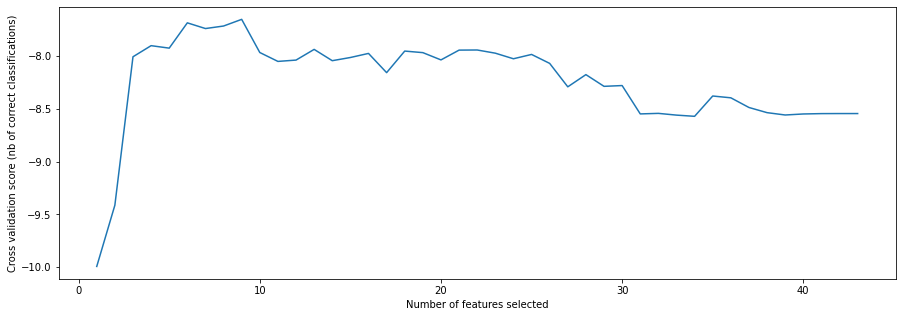

In [74]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='neg_mean_absolute_error')
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()


In [75]:
rfecv.ranking_

array([24, 21, 17, 16, 15, 18,  9,  3, 10, 11,  1,  1,  1,  1,  1, 14, 32,
       13, 12, 20,  6, 27, 33, 31, 23, 19,  1, 28,  5,  2,  8,  4,  1,  1,
        7, 26, 29, 35, 22, 34, 30, 25,  1])

In [76]:
feat_importance = pd.DataFrame(data={'1':rfecv.ranking_, '2':x_train.columns}).sort_values('1', ascending=False)

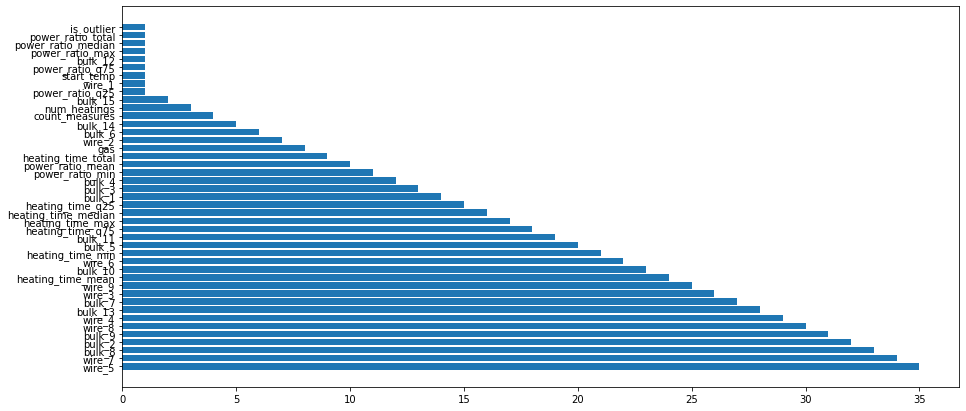

In [77]:
plt.figure(figsize=(15, 7))
plt.barh(feat_importance['2'], feat_importance['1'])
plt.show()

In [78]:
important_cols = feat_importance.iloc[-9:, 1].to_list()

In [79]:
important_cols

['power_ratio_q25',
 'wire_1',
 'start_temp',
 'power_ratio_q75',
 'bulk_12',
 'power_ratio_max',
 'power_ratio_median',
 'power_ratio_total',
 'is_outlier']

In [80]:
x_train = x_train.loc[:, important_cols]
x_test = x_test.loc[:, important_cols]

In [81]:
x_train.head()

,power_ratio_q25,wire_1,start_temp,power_ratio_q75,bulk_12,power_ratio_max,power_ratio_median,power_ratio_total,is_outlier
1953,-0.151651,-0.340863,-0.283328,-1.343199,-1.295838,-0.241648,-0.861201,-0.271861,-0.711409
1062,0.040135,0.046805,1.180845,-1.271568,0.326207,-1.480849,-0.669887,-1.569737,-0.711409
1625,-0.912401,0.090345,-0.044975,-1.076571,1.331239,1.805330,-0.552973,0.672048,-0.711409
1415,-1.500545,2.751303,0.772239,-1.315342,0.008159,-0.939272,-1.211942,-0.464672,-0.064406
585,-0.126079,0.935817,0.874390,-0.881575,1.229464,0.079627,-0.478574,0.018794,-0.711409


### Обучение LinearRegression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [83]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [84]:
prediction_lr = lr.predict(x_test)

In [85]:
def extansive_score(y_test, y_pred, num_obj_to_plot, model_name='model'):
    
    plt.figure(figsize=(15,5))
    plt.plot(y_test.reset_index(drop=True)[:num_obj_to_plot], label='Тестовые данные')
    plt.plot(pd.Series(y_pred)[:num_obj_to_plot], label='Предсказания модели')
    plt.title('График предсказаний модели ' + model_name)
    plt.xlabel('Номер партии / объекта')
    plt.ylabel('Температура, °C')
    plt.legend()
    plt.grid(True)
    
    print('{} score: {:.3f}'.format(model_name, mean_absolute_error(y_test, y_pred)))

LinearRegression score: 8.230


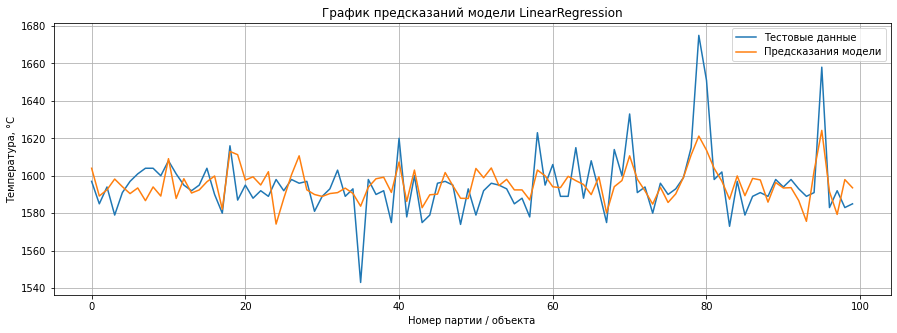

In [86]:
extansive_score(y_test, prediction_lr, 100, model_name='LinearRegression')

### Обучение RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [75]:
params_rf = {'n_estimators':[50, 100, 150],
             'criterion':['mae'],
             'max_depth':[3,4,5],
             'random_state':[42]}
rf = RandomForestRegressor()

In [76]:
searcher = RandomizedSearchCV(rf, params_rf, random_state=42)

In [77]:
%%time
searcher.fit(x_train, y_train)

/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 4min 10s, sys: 1.73 s, total: 4min 12s
Wall time: 4min 21s


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mae'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'random_state': [42]},
                   random_state=42)

In [78]:
searcher.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=5, n_estimators=150,
                      random_state=42)

In [79]:
prediction_rf = searcher.best_estimator_.predict(x_test)

RandomForestRegressor score: 6.785


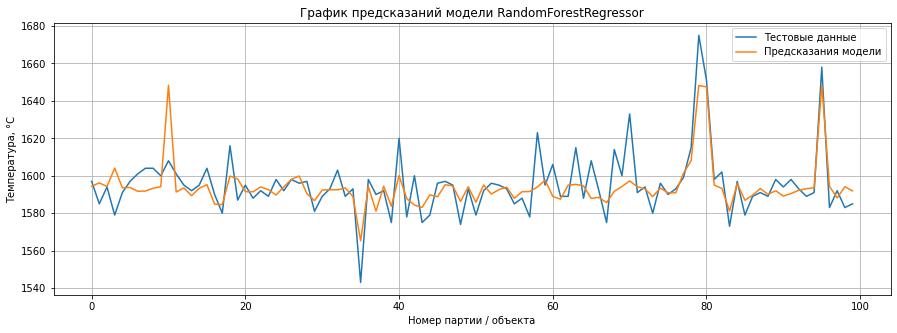

In [80]:
extansive_score(y_test, prediction_rf, 100, model_name='RandomForestRegressor')

### Обучение CatBoostRegressor

In [87]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [88]:
params_cb = {'n_estimators':[50, 100, 150],
             'loss_function':['MAE'],
             'max_depth':[3,4,5],
             'random_state':[42],
             'verbose':[False]}
cb = CatBoostRegressor()

In [89]:
searcher_cb = GridSearchCV(cb, params_cb, cv=5)

In [90]:
%%time
searcher_cb.fit(x_train, y_train)
best_est_cb = searcher_cb.best_estimator_
prediction_cb = best_est_cb.predict(x_test)

CPU times: user 13 s, sys: 2.16 s, total: 15.1 s
Wall time: 7.77 s


CatBoostRegressor score: 6.503


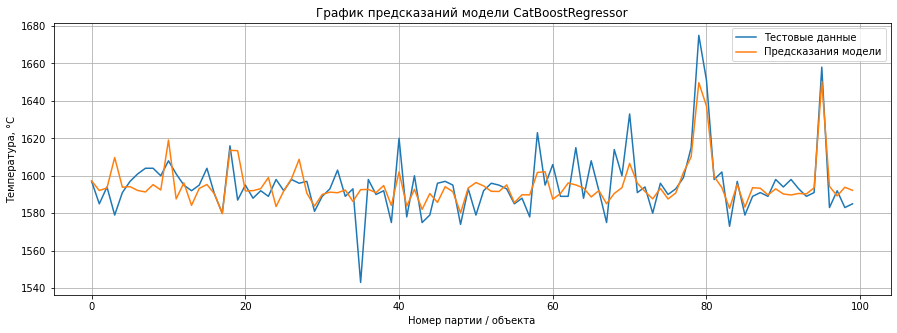

In [91]:
extansive_score(y_test, prediction_cb, 100, model_name='CatBoostRegressor')

### Обучение LightGBM

In [92]:
from lightgbm import LGBMRegressor

In [93]:
params_lgbm = {'n_estimators':[50, 100, 150],
               'learning_rate':[0.1, 0.01, 0.001],
               'max_depth':[3, 4, 5],
               'num_leaves':range(5,10),
               'random_state':[42]}
lgbm = LGBMRegressor()

In [94]:
searcher_lgbm = GridSearchCV(lgbm, params_lgbm, cv=5)

In [95]:
%%time
searcher_lgbm.fit(x_train, y_train)
best_est_lgbm = searcher_lgbm.best_estimator_
prediction_lgbm = best_est_lgbm.predict(x_test)

CPU times: user 1min 19s, sys: 21.1 s, total: 1min 40s
Wall time: 31.1 s


LGBMRegressor score: 6.510


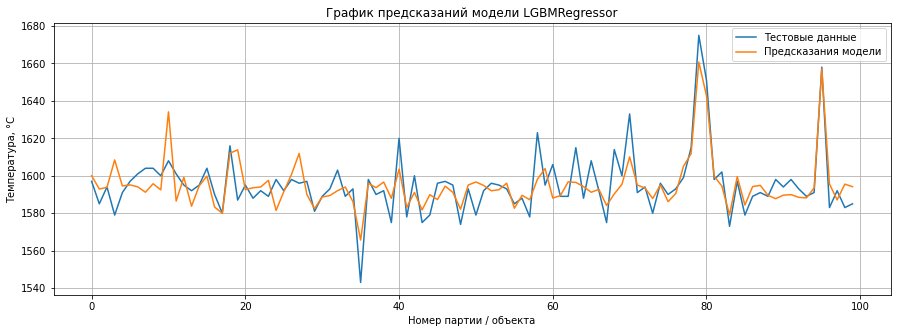

In [96]:
extansive_score(y_test, prediction_lgbm, 100, model_name='LGBMRegressor')

### Обучение XGBoost

In [97]:
from xgboost import XGBRegressor

In [98]:
params_xgb = {'n_estimators':[50, 100, 150],
               'learning_rate':[0.1, 0.01, 0.001],
               'max_depth':[3,4,5],
               'random_state':[42]}
xgb = XGBRegressor()

In [99]:
searcher_xgb = GridSearchCV(xgb, params_xgb, cv=5)

In [100]:
%%time
searcher_xgb.fit(x_train, y_train)
best_est_xgb = searcher_xgb.best_estimator_
prediction_xgb = best_est_xgb.predict(x_test)

CPU times: user 33.5 s, sys: 6.68 s, total: 40.2 s
Wall time: 14.7 s


XGBoost score: 6.481


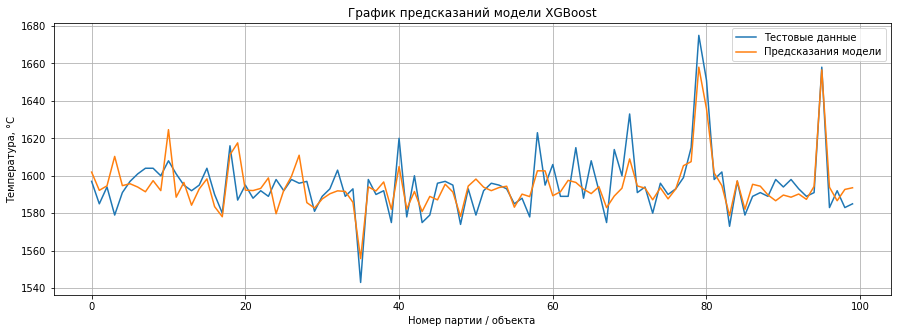

In [101]:
extansive_score(y_test, prediction_xgb, 100, model_name='XGBoost')

## Тюнинг самой результативной модели

In [102]:
predictions = [prediction_lr, prediction_rf, prediction_cb, prediction_lgbm, prediction_xgb]
models = ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor', 'LGBMRegressor', 'XGBRegressor']
scores = []


for pred in predictions:
    scores.append(mean_absolute_error(y_test, pred))
score_data = pd.DataFrame(data={'model':models, 'score':scores})

fig, ax = plt.subplots(figsize=(15, 3))
hbars = ax.barh(score_data['model'], score_data['score'], align='center')
ax.set_ylabel('Models')
ax.set_xlabel('MAE score')
ax.set_title('Рейтинг предиктивных моделей')

ax.bar_label(hbars, fmt='%.2f', label_type='center')

plt.show()

NameError: name 'prediction_rf' is not defined

Самой результативной оказалась модель XGBRegressor. С ней и продолжим работу.

Улучшать модель можно по двум напривлениям: подбор гиперпараметров и feature engineering. Начнем с feature engineering. В данных есть еще информация, которая может быть полезной.

### Feature engineering

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

display(x_train.shape)
display(y_train.shape)

(1758, 44)

(1758,)

In [104]:
from boruta import BorutaPy



# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
xgb = searcher_xgb.best_estimator_

# define Boruta feature selection method
feat_selector = BorutaPy(xgb, n_estimators='auto', verbose=2, random_state=42)

# find all relevant features - 5 features should be selected
feat_selector.fit(x_train.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	44
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	21
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	21
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	21
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	21
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	8
Rejected: 	21
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	8
Rejected: 	21
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	8
Rejected: 	21
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	8
Rejected: 	21
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	8
Reject

BorutaPy(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, gpu_id=-1,
                                importance_type='gain',
                                interaction_constraints='', learning_rate=0.1,
                                max_delta_step=0, max_depth=4,
                                min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=158,
                                n_jobs=4, num_parallel_tree=1,
                                random_state=464096031, reg_alpha=0,
                                reg_lambda=1, scale_pos_weight=1, subsample=1,
                                tree_method='exact', validate_parameters=1,
                                verbosity=None),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FDF08A86740, verbose=2)

In [105]:
# check selected features - first 5 features are selected
feat_selector.support_


array([False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True])

In [106]:
# check ranking of features
feat_selector.ranking_

array([14,  4, 15,  1,  6,  8,  1,  1, 12,  1, 22, 22, 22, 22, 22, 22,  1,
        1, 11,  1,  6,  1,  1, 22, 22,  8, 14, 10, 16,  3,  1,  1,  9,  1,
        1,  1,  2,  1, 22,  3,  1, 22, 22,  1])

In [107]:
feat_importance = pd.DataFrame(data={'1':feat_selector.ranking_, '2':x_train.columns}).sort_values('1', ascending=False)

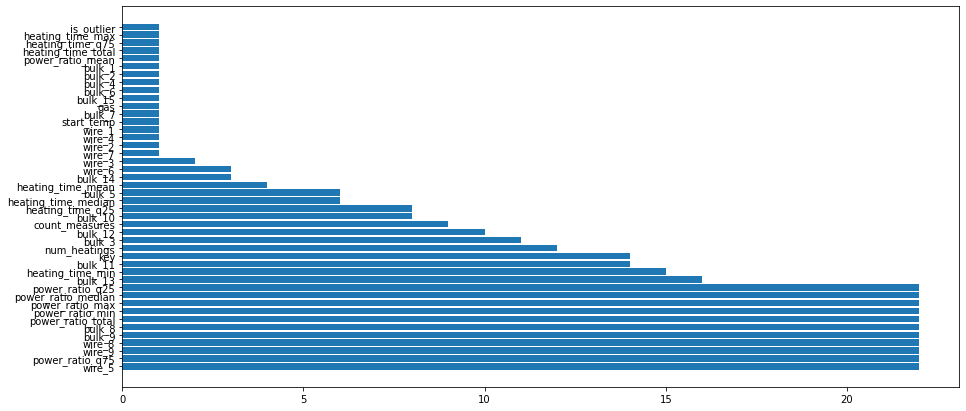

In [108]:
plt.figure(figsize=(15, 7))
plt.barh(feat_importance['2'], feat_importance['1'])
plt.show()

In [109]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(x_train.values)

In [110]:
X_filtered

array([[ 266.  ,  125.  ,  707.  , ...,    0.  ,    0.  ,    0.  ],
       [ 131.  ,  129.5 ,  256.  , ...,    0.  ,    0.  ,    0.  ],
       [ 489.  ,  141.75, 1035.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [ 271.  ,  189.  ,  476.  , ...,    0.  ,    0.  ,    0.  ],
       [ 310.  ,  283.75,  850.  , ...,    0.  ,    0.  ,    0.  ],
       [ 213.  ,  199.5 ,  536.  , ...,    0.  ,    0.  ,    0.  ]])

In [111]:
%%time
searcher_xgb.fit(X_filtered, y_train)
best_est_xgb = searcher_xgb.best_estimator_
prediction_xgb = best_est_xgb.predict(feat_selector.transform(x_test.values))

CPU times: user 40.4 s, sys: 6.58 s, total: 47 s
Wall time: 19.1 s


XGBoost score: 6.126


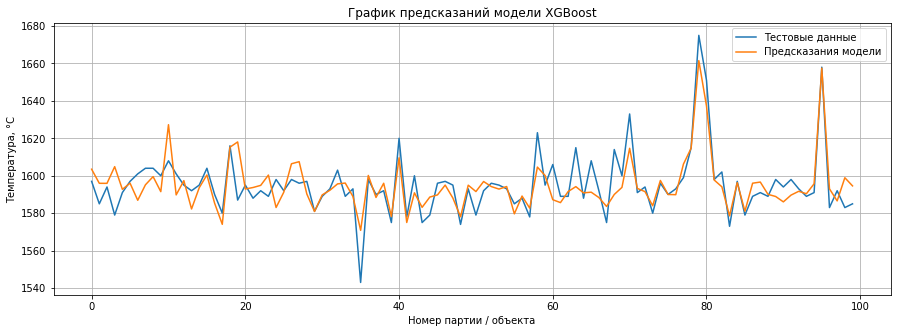

In [112]:
extansive_score(y_test, prediction_xgb, 100, model_name='XGBoost')

In [133]:
important_cols = feat_importance.loc[feat_importance['1'].isin([1, 2, 3])]['2'].to_list()
important_cols

['bulk_14',
 'wire_6',
 'wire_3',
 'wire_7',
 'wire_2',
 'wire_4',
 'wire_1',
 'start_temp',
 'bulk_7',
 'gas',
 'bulk_15',
 'bulk_6',
 'bulk_4',
 'bulk_2',
 'bulk_1',
 'power_ratio_mean',
 'heating_time_total',
 'heating_time_q75',
 'heating_time_max',
 'is_outlier']

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

display(x_train.shape)
display(y_train.shape)

### Грубая предобработка train

#Нормируем данные. Прогоним фреймы через StandardScaler:

def normalize(x_train, x_test):
    # запоминаем названия колонок с количественным признаком                                
    col_names = [x for x in x_train.columns]
    
    # обучаем модель нормирования на тренировочной выборке                                                                            
    scaler = StandardScaler()
    scaler.fit(x_train[col_names])
    
    # выключаем длинное предупреждение о копировании                                                                            
    pd.options.mode.chained_assignment = None

    # преобразовываем количественные признаки                                                                            
    x_train[col_names] = scaler.transform(x_train[col_names])
    x_test[col_names] = scaler.transform(x_test[col_names])

                                                                                
    return x_train, x_test

x_train, x_test = normalize(x_train.iloc[:, 1:], x_test.iloc[:, 1:]) 

(1758, 44)

(1758,)

In [135]:
x_train = x_train.loc[:, important_cols]
x_test = x_test.loc[:, important_cols]

In [137]:
%%time
searcher_xgb.fit(x_train, y_train)
best_est_xgb = searcher_xgb.best_estimator_
prediction_xgb = best_est_xgb.predict(x_test)

CPU times: user 45.9 s, sys: 7.09 s, total: 53 s
Wall time: 16.8 s


XGBoost score: 6.146


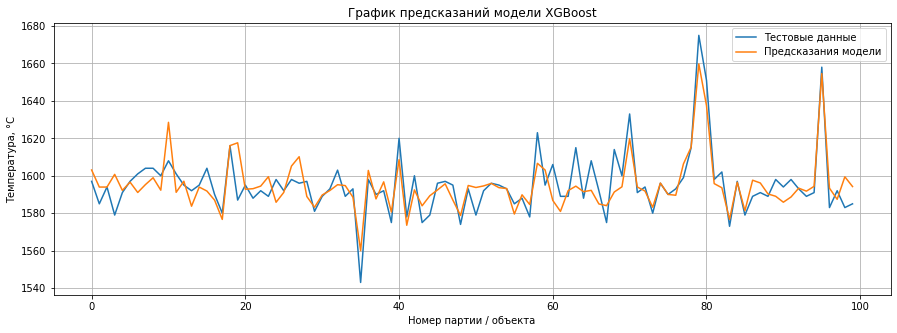

In [138]:
extansive_score(y_test, prediction_xgb, 100, model_name='XGBoost')

In [124]:
general_table.loc[:, important_cols]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['is_outlier'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

## Дополнительное задание

Вам поручили изучить характеристики процесса обработки стали. Для каждого значения столбца key найдите:

- [ ] Длительность времени между первым и последним замером температуры.
- [ ] Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов.
- [ ] Количество запусков нагрева электродами.
- [ ] Среднее соотношение потребления активной и реактивной мощности.


По всем полученным столбцам вычислите статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей

In [150]:
data_arc.head()

,key,heating_time_mean,num_heatings
0,1,219.60,5
1,2,202.75,4
2,3,131.00,5
3,4,185.25,4
4,5,217.25,4


## Выводы